<a href="https://colab.research.google.com/github/yahiroyudai/DeepLearning2022Late/blob/main/CNN%2BTrain_example2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CNN(畳み込みを含むニューラルネットワーク)でモデルが奇襲をさせる(=訓練)

###学習モデルのライブラリをimport

In [1]:
from keras.models import Sequential, Model #学習モデルのクラス
from keras.layers import Conv2D #畳み込み層のクラス
from keras.layers import Flatten #全結合層用のクラス
from keras.layers import Dense #(分類出力用の)普通のニューロン層

###keras自身もimport

In [2]:
import keras

###SVG画像表示用のライブラリをimport

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

###その他ライブラリをimport

In [4]:
#乱数を作るためにNumpyをimport
import numpy as np #importして、npという別名を設定
#早期終了(Earl Stopping)のためのライブラリをimport
import keras.callbacks as callbacks #callbacksという別名を設定

###Numpyで乱数を作り、ダミーデータとして学習用、検証用にする

In [5]:
#学習用データをx_trainとして作る
x_train = np.random.random((100, 6, 6, 1))
#学習用データの正解をy_trainとして作る
y_train = keras.utils.to_categorical(np.random.randint(10, size = (100, 1)),
                                     num_classes = 10)

In [6]:
#学習用データをx_testとして作る
#(6, 6, 1)の形を今度は20セット分
x_test = np.random.random((20, 6, 6, 1))
#学習用データの正解をy_testとして作る
y_test = keras.utils.to_categorical(np.random.randint(10, size = (20, 1)),
                                     num_classes = 10)

###学習モデルを生成する


In [7]:
model = Sequential()

##学習モデルにニューロンの層を追加してニューラルネットワークにする


###畳み込み層の追加

In [8]:
model.add(Conv2D(
    filters = 3, #３パターンのフィルター
    kernel_size = (3, 3), #受容野縦３,横３
    kernel_initializer = "lecun_uniform",
    input_shape = (6, 6, 1), #入力画像１個分の形縦６,横６
    name = 'Conv2D_1'
))

###その他の層も追加する

In [9]:
#全結合層'
model.add(Flatten(name = 'Flatten_1'))
#softmaxで分類するニューロン層
model.add(Dense(units = 10, activation = 'softmax', name = 'Dense_1'))

###組み立てた学習モデルの構成を、SVG画像として表示

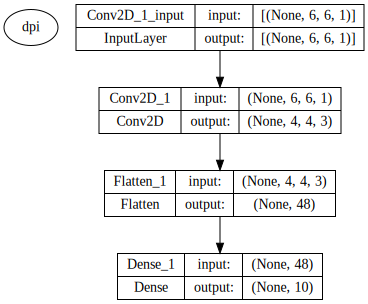

In [10]:
SVG(model_to_dot(model,
              show_shapes = True,
              dpi = None).create(prog = 'dot', format = 'svg'))

##組み立てたモデルを学習データで訓練する
早期終了も設定する

In [11]:
#早期終了用の設定のオブジェクトも用意する
earlyStopping = callbacks.EarlyStopping(monitor = 'val_loss', #損失を監視
                                        patience = 5) #epoch5つ分様子を見る

##学習方法を指定して学習モデルをコンパイルする

In [12]:
model.compile(loss = 'mean_squared_error', #損失を平均(mean)二乗(Suqared)誤差(Error)で計算)
                optimizer = 'sgd' #パラメータの重みをSGDで最適化する
              )

###学習モデルを指定した学習モデルを訓練する

In [13]:
model.fit(x_train, y_train, #学習データと答えデータ
          batch_size = 32, #32個ずつまとめて学習(=バッチ学習)してから重みを調整する
          epochs = 10, #バッチが終わったら重みを調整して学習しなおす、その回数
          callbacks = [earlyStopping], #エポックの中で呼ぶcallback処理のリストに早期終了を追加
          validation_split = 0.2 #学習データのうち２割を、学習中の自己評価検証に使う
          )

Epoch 1/10
3/3 [==============================] - 1s 75ms/step - loss: 0.1290 - val_loss: 0.1348
Epoch 2/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1280 - val_loss: 0.1338
Epoch 3/10
3/3 [==============================] - 0s 14ms/step - loss: 0.1270 - val_loss: 0.1329
Epoch 4/10
3/3 [==============================] - 0s 15ms/step - loss: 0.1260 - val_loss: 0.1320
Epoch 5/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1251 - val_loss: 0.1311
Epoch 6/10
3/3 [==============================] - 0s 14ms/step - loss: 0.1242 - val_loss: 0.1302
Epoch 7/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1233 - val_loss: 0.1294
Epoch 8/10
3/3 [==============================] - 0s 13ms/step - loss: 0.1224 - val_loss: 0.1285
Epoch 9/10
3/3 [==============================] - 0s 24ms/step - loss: 0.1216 - val_loss: 0.1277
Epoch 10/10
3/3 [==============================] - 0s 22ms/step - loss: 0.1208 - val_loss: 0.1270
